In [74]:
from SUS.clustering import kernel_km


In [75]:
import time as t
tic = t.process_time()
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [76]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

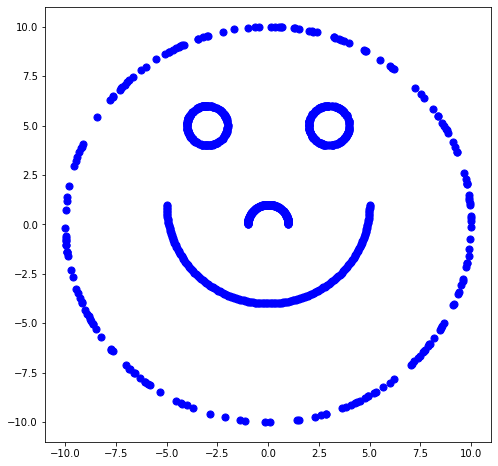

In [77]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

In [78]:
#function for ploting the results
def plot_(X,y,init_center):
        n = y[1].__len__()
        color = iter(cm.rainbow(np.linspace(.3, 1, n+1)))
        fig = getFigure( 12, 12)

        for i in range (len(y[1])):
            col = next(color)
            plt.scatter(X[y[0]==i,0],X[y[0]==i,1],marker='o', color = col, s=100,edgecolor='black', label='cluster '+str(i+1))
        
        plt.scatter(y[1][:,0],y[1][:,1],s=250, marker='*',c='red', edgecolor='black', label='centroids')
        plt.scatter(init_center[:,0],init_center[:,1],s=200, marker='+',c='black', label='initial centers')
        plt.legend(scatterpoints=1)
        plt.grid()
        return 

In [79]:
km = kmeans(n_clusters=5, max_iter=100) #fit the model
centroids = km.init_centroids(X)          #initilizing the parameters
# y_means = km.fit_predict(X,centroids)       #train and test
# print("Model converges after "+str(y_means[2])+" iteration")
# plot_(X,y_means,centroids)                                  #plot the output
# plt.title("K-Means Clustering")
# plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/monojitlayek/tensorflow-test/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/dy/dqwjhxdd5m9bxwxj_zz8j4v40000gn/T/ipykernel_7937/3606962885.py", line 2, in <cell line: 2>
    centroids = km.init_centroids(X)          #initilizing the parameters
  File "/Users/monojitlayek/Jupyter Lab/Git Projects/SUS Libery/SUS/clustering.py", line 10, in init_centroids
NameError: name 'np' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/monojitlayek/tensorflow-test/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 1993, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/monojitlayek/tensorflow-test/env/lib/python3.9/site-packages/IPython/core/ultratb.py", line 1118, in structured_traceback
    return

In [64]:
X

array([[1.        , 0.        ],
       [0.99987539, 0.01578624],
       [0.99950159, 0.03156855],
       ...,
       [2.61814495, 5.92422223],
       [2.76633903, 4.02768187],
       [2.580723  , 4.09214164]])